# Projet d'INFOIA - Alexandre Baumerder

#### Le but de ce projet est de calculer la volatilité du cours boursier d'une action que l'utilisateur choisi, ainsi qu'un autre indicateur très largement utilisé par les traders dans leurs analyses financieres : le MACD (Moving Average Convergence Divergence).

## Part. 1 : La volatilité

Passons au code,  
Importation des bibliothèques nécessaires au projet :

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from alpha_vantage.timeseries import TimeSeries

Nous allons utiliser l'API d'[Alpha Vantage](https://www.alphavantage.co/) afin de récupérer la data sur le cours boursier qui nous intéresse en vue de la traiter grâce à pandas et enfin afficher le résultat grâce à matplotlib. Pour ce qui suit, nous allons nous intéresser à l'action HSBC, car c'est la banque dans laquelle j'effectue actuellement mon stage CME. Mais l'utilisateur peut s'il le désire, changer le ticker afin de voir l'analyse d'un autre cours bousier. Par exemple pour l'action Apple mettre AAPL au lieu de HSBC en ticker.

In [2]:
ticker = 'HSBC'

Récupération de la data via l'API

In [4]:
ts = TimeSeries('ORD56EQTDH50QXI8', output_format='pandas')
data, meta_data = ts.get_daily(ticker, outputsize='full')

Visualisation de la data brute

In [5]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-07-22,30.99,31.2200,30.775,30.92,2030303.0
2022-07-21,30.69,31.3500,30.630,31.33,3096326.0
2022-07-20,31.10,31.1800,30.735,30.94,2292508.0
2022-07-19,31.37,31.6086,31.280,31.57,3802271.0
2022-07-18,31.14,31.3600,30.915,31.01,2759291.0


Calcul de la volatilité historique annuelle du cours boursier (il y a 252 jours tradés par an)

In [6]:
data = data.head(252) 

In [7]:
data['6. log returns'] = np.log(data['4. close']/data['4. close'].shift())
data['6. log returns'].std()
volatility = data['6. log returns'].std()*252**.5
vol = str(round(volatility, 4)*100)

Visualisation du résultat

<IPython.core.display.Javascript object>


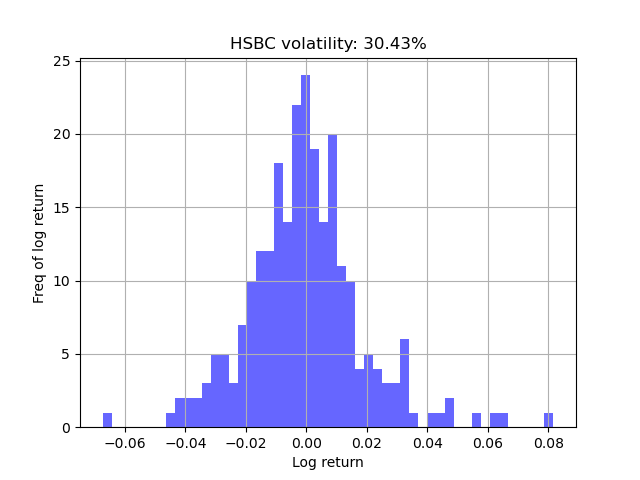

Text(0.5, 1.0, 'HSBC volatility: 30.43%')

In [8]:
fig, ax = plt.subplots()
data['6. log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title(ticker + ' volatility: ' + vol + '%')

## Part. 2 : Le MACD

Pour calculer cet indicateur, nous allons réutiliser la période annuelle que nous avons créée lors de la première partie.  
Calcul du MACD :

In [9]:
a = data['4. close'].ewm(span=12, adjust=False).mean()
b = data['4. close'].ewm(span=26, adjust=False).mean()
data['7. MACD'] = a - b

Visualisation du résultat

<IPython.core.display.Javascript object>


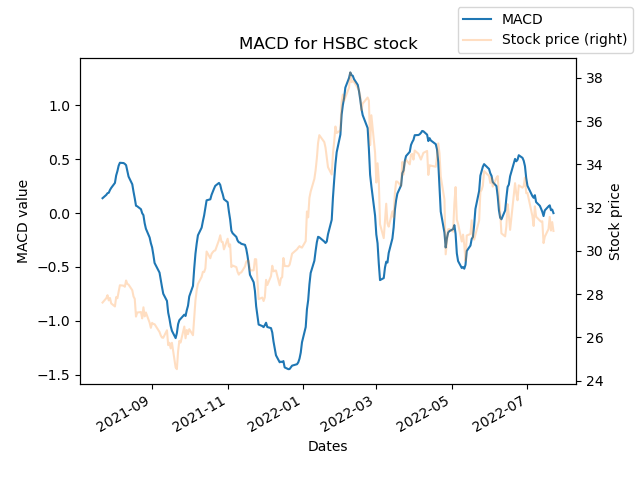

In [10]:
fig, ax = plt.subplots()
c = data['7. MACD'].plot(ax=ax,label='MACD')
d = data['4. close'].plot(ax=ax, alpha=0.25, secondary_y=True, label='Stock price')
ax.set_xlabel('Dates')
c.set_ylabel('MACD value')
d.set_ylabel('Stock price')
ax.set_title('MACD for ' + ticker + ' stock')
leg = fig.legend()